# **Health Care Analysis**

## **Import Package and Data**

In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Healthcare Analysis/Health_dataset.csv")

## **EDA**

In [4]:
df.head(5)

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth
0,PAT-00001,Male,Tuberculosis,Dialysis,City General Hospital,2022-12-19,2023-01-16,Recovered,NaN,1973-06-05
1,PAT-00002,Female,Malaria,Dialysis,City General Hospital,2023-03-29,2023-04-21,Recovered,NaN,1998-11-21
2,PAT-00003,Female,Malaria,Surgery,City General Hospital,2022-09-16,2022-10-15,Recovered,NaN,1942-02-14
3,PAT-00004,Male,Asthma,Dialysis,City General Hospital,2022-02-07,2022-02-11,Recovered,NaN,1943-01-17
4,PAT-00005,Female,Diabetes,Physical Therapy,City General Hospital,2022-10-25,2022-10-30,Recovered,NaN,1979-07-28


In [5]:
df.describe()

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth
count,8000,8000,8000,8000,8000,8000,8000,8000,419,8000
unique,8000,2,15,7,7,762,787,3,4,7130
top,PAT-00001,Male,Malaria,Dialysis,Lifeline Hospital,2023-07-26,2023-03-24,Recovered,Multiple Organ Failure,1928-09-28
freq,1,5206,1193,2498,2400,21,24,6819,114,4


In [6]:
df.dtypes

,0
Patient ID,object
Gender,object
Disease,object
Treatment,object
Hospital,object
Admission Date,object
Discharge Date,object
Treatment Status,object
Cause of Death,object
Date of Birth,object


In [7]:
df=df.rename(columns={'Patient ID':'Patient_ID',
                   'Admission Date':'Admission_Date',
                   'Discharge Date':'Discharge_Date',
                   'Treatment Status':'Treatment_Status',
                   'Cause of Death':'Cause_of_Death',
                   'Date of Birth':'Date_of_Birth'})

In [8]:
df.columns

Index(['Patient_ID', 'Gender', 'Disease', 'Treatment', 'Hospital',
       'Admission_Date', 'Discharge_Date', 'Treatment_Status',
       'Cause_of_Death', 'Date_of_Birth'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_ID        8000 non-null   object
 1   Gender            8000 non-null   object
 2   Disease           8000 non-null   object
 3   Treatment         8000 non-null   object
 4   Hospital          8000 non-null   object
 5   Admission_Date    8000 non-null   object
 6   Discharge_Date    8000 non-null   object
 7   Treatment_Status  8000 non-null   object
 8   Cause_of_Death    419 non-null    object
 9   Date_of_Birth     8000 non-null   object
dtypes: object(10)
memory usage: 625.1+ KB


In [10]:
df.isnull().sum()

,0
Patient_ID,0
Gender,0
Disease,0
Treatment,0
Hospital,0
Admission_Date,0
Discharge_Date,0
Treatment_Status,0
Cause_of_Death,7581
Date_of_Birth,0


In [11]:
total_patients=df['Patient_ID'].count()
print(f"The number of patients are {total_patients}")

The number of patients are 8000


In [12]:
Gender=df['Gender'].value_counts()
Gender

,count
Gender,
Male,5206
Female,2794


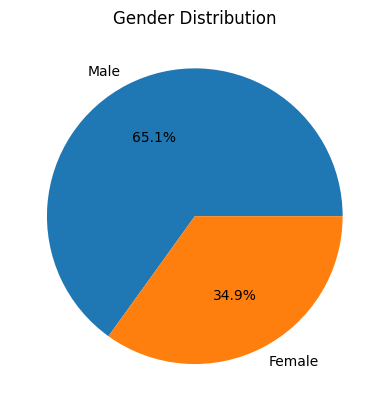

In [13]:
plt.pie(Gender,labels=Gender.index,autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [14]:
df['Date_of_Birth']=pd.to_datetime(df['Date_of_Birth'])
df['Admission_Date']=pd.to_datetime(df['Admission_Date'])
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Patient_ID        8000 non-null   object        
 1   Gender            8000 non-null   object        
 2   Disease           8000 non-null   object        
 3   Treatment         8000 non-null   object        
 4   Hospital          8000 non-null   object        
 5   Admission_Date    8000 non-null   datetime64[ns]
 6   Discharge_Date    8000 non-null   datetime64[ns]
 7   Treatment_Status  8000 non-null   object        
 8   Cause_of_Death    419 non-null    object        
 9   Date_of_Birth     8000 non-null   datetime64[ns]
dtypes: datetime64[ns](3), object(7)
memory usage: 625.1+ KB


## **Age Group**

In [34]:
df['Age']=df['Admission_Date'].dt.year-df['Date_of_Birth'].dt.year
df['Age'].head()

,Age
0,49
1,25
2,80
3,79
4,43


In [18]:
#Grouping age by the groups
bins=[0,12,18,26,46,60,100]
labels=['Child','Teenager','Young Adult','Adult','Senior','Elderly']
df['Age_Groups']=pd.cut(df['Age'],bins=bins,labels=labels,right=True)

In [19]:
df[['Age','Age_Groups']].head()

,Age,Age_Groups
0,49,Senior
1,25,Young Adult
2,80,Elderly
3,79,Elderly
4,43,Adult


In [20]:
df['Age_Groups'].value_counts()

,count
Age_Groups,
Elderly,3180
Adult,1613
Senior,1131
Child,950
Young Adult,662
Teenager,464


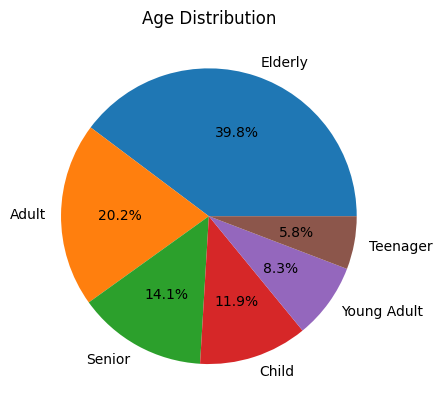

In [21]:
plt.pie(df['Age_Groups'].value_counts(),labels=df['Age_Groups'].value_counts().index,autopct='%1.1f%%')
plt.title('Age Distribution')
plt.show()

## **Disease Insight**

In [22]:
#EDA for disease
df[['Disease']].describe()

,Disease
count,8000
unique,15
top,Malaria
freq,1193


In [23]:
#Rank of disease
Disease_Counts=df['Disease'].value_counts().sort_values(ascending=True)
Disease_Counts
total_disease=df['Disease'].value_counts().sum()
Top_Disease=Disease_Counts
Top_Disease

,count
Disease,
Dengue,69
COVID-19,157
Hypertension,173
Liver Disease,244
Pneumonia,246
Kidney Failure,475
HIV/AIDS,488
Stroke,493
Heart Disease,567


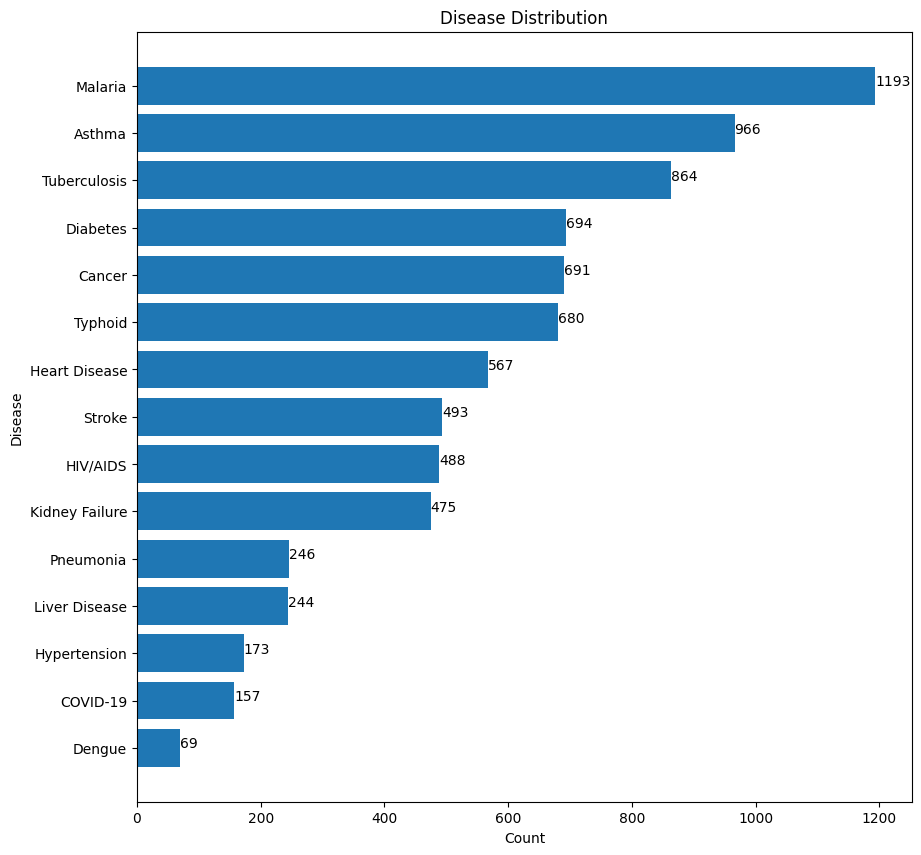

In [24]:
plt.figure(figsize=(10,10))
plt.barh(Disease_Counts.index,Disease_Counts.values)
plt.xlabel('Count')
plt.ylabel('Disease')
plt.title('Disease Distribution')
for index,value in enumerate(Disease_Counts.values):
  plt.text(value,index,str(value))
plt.show()

In [25]:
percentage_top_disease=(Top_Disease/total_disease)*100
percentage_top_disease = percentage_top_disease.round(0).astype(int).astype(str) + '%'
percentage_top_disease

,count
Disease,
Dengue,1%
COVID-19,2%
Hypertension,2%
Liver Disease,3%
Pneumonia,3%
Kidney Failure,6%
HIV/AIDS,6%
Stroke,6%
Heart Disease,7%


### **Disease by Gender**

In [26]:
gender_disease=pd.crosstab(df['Disease'],df['Gender'])
gender_disease.sort_values(by='Male',ascending=False)

Gender,Female,Male
Disease,,
Malaria,407,786
Asthma,320,646
Tuberculosis,302,562
Cancer,239,452
Typhoid,239,441
Diabetes,256,438
Heart Disease,206,361
HIV/AIDS,155,333
Stroke,177,316


In [27]:
df.head(5)

,Patient_ID,Gender,Disease,Treatment,Hospital,Admission_Date,Discharge_Date,Treatment_Status,Cause_of_Death,Date_of_Birth,Age,Age_Groups
0,PAT-00001,Male,Tuberculosis,Dialysis,City General Hospital,2022-12-19,2023-01-16,Recovered,NaN,1973-06-05,49,Senior
1,PAT-00002,Female,Malaria,Dialysis,City General Hospital,2023-03-29,2023-04-21,Recovered,NaN,1998-11-21,25,Young Adult
2,PAT-00003,Female,Malaria,Surgery,City General Hospital,2022-09-16,2022-10-15,Recovered,NaN,1942-02-14,80,Elderly
3,PAT-00004,Male,Asthma,Dialysis,City General Hospital,2022-02-07,2022-02-11,Recovered,NaN,1943-01-17,79,Elderly
4,PAT-00005,Female,Diabetes,Physical Therapy,City General Hospital,2022-10-25,2022-10-30,Recovered,NaN,1979-07-28,43,Adult


## **Hospital Distribution**

In [28]:
#Total hospital
df['Hospital'].value_counts()

,count
Hospital,
Lifeline Hospital,2400
Greenfield Medical,1600
Hope Medical Center,1520
Global Health Clinic,1120
MetroCare Hospital,640
City General Hospital,400
Sunrise Clinic,320


Text(0.5, 1.0, 'Hospital Distribution')

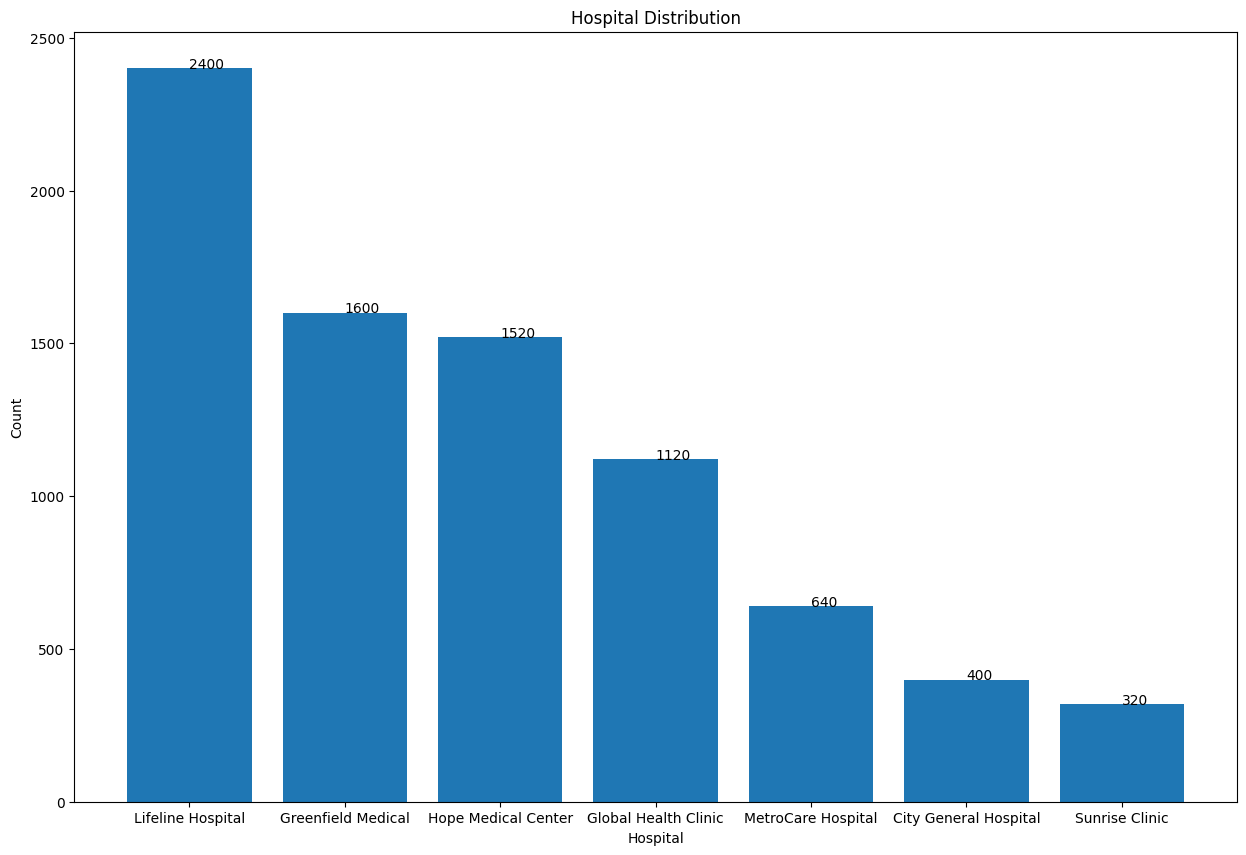

In [29]:
plt.figure(figsize=(15,10))
plt.bar(df['Hospital'].value_counts().index,df['Hospital'].value_counts().values)
plt.xlabel('Hospital')
plt.ylabel('Count')
for index,value in enumerate(df['Hospital'].value_counts().values):
  plt.text(index,value,str(value))
plt.title('Hospital Distribution')

In [30]:
#Disease Recovery
df['Length_of_Stay']=df['Discharge_Date']-df['Admission_Date']
df['Length_of_Stay']=df['Length_of_Stay'].dt.days
Disease_Recovery=df.groupby('Disease')['Length_of_Stay'].mean()
Disease_Recovery.sort_values(ascending=False)

,Length_of_Stay
Disease,
Liver Disease,16.069672
Asthma,15.940994
Pneumonia,15.719512
Tuberculosis,15.708333
Malaria,15.691534
Typhoid,15.592647
HIV/AIDS,15.526639
Kidney Failure,15.509474
Heart Disease,15.497354


## **Disease By Age Groups**

In [31]:
age_disease_counts=df.groupby(['Age_Groups','Disease']).size().reset_index(name='Count')
age_disease_counts

<ipython-input-31-78f376bca129>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_disease_counts=df.groupby(['Age_Groups','Disease']).size().reset_index(name='Count')


,Age_Groups,Disease,Count
0,Child,Asthma,95
1,Child,COVID-19,26
2,Child,Cancer,87
3,Child,Dengue,6
4,Child,Diabetes,89
...,...,...,...
85,Elderly,Malaria,457
86,Elderly,Pneumonia,92
87,Elderly,Stroke,202
88,Elderly,Tuberculosis,355


In [32]:
top_disease_by_age=age_disease_counts.sort_values(['Age_Groups','Count'],ascending=[True,False])
top_disease_by_age.groupby('Age_Groups').head(3)

<ipython-input-32-1c862a358c9a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_disease_by_age.groupby('Age_Groups').head(3)


,Age_Groups,Disease,Count
10,Child,Malaria,164
13,Child,Tuberculosis,108
0,Child,Asthma,95
25,Teenager,Malaria,64
15,Teenager,Asthma,58
17,Teenager,Cancer,43
40,Young Adult,Malaria,99
30,Young Adult,Asthma,87
34,Young Adult,Diabetes,60
55,Adult,Malaria,254


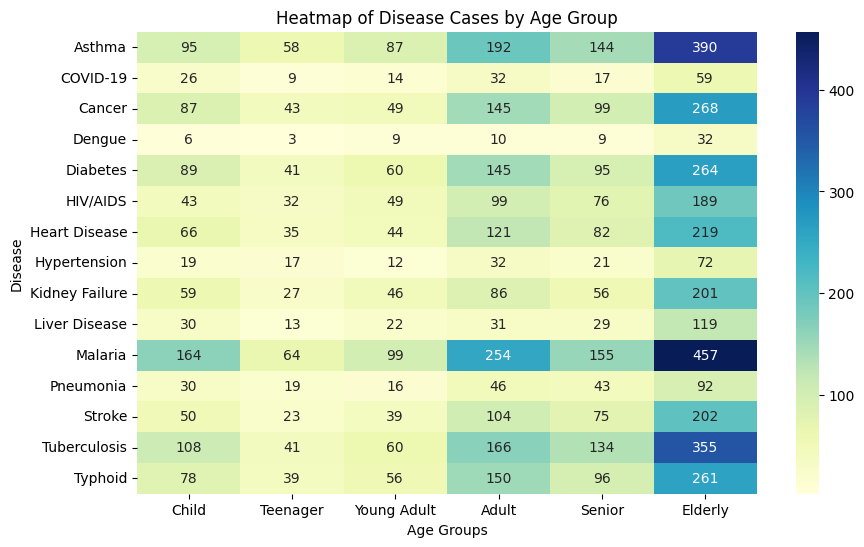

In [35]:
heatmap_data = age_disease_counts.pivot(index='Disease', columns='Age_Groups', values='Count')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Disease Cases by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Disease')
plt.show()